In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [36]:
data = pd.read_csv('./data/lemmatized_posts.csv')

In [37]:
data.head(2)

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
0,middle aged guys don't buy sports cars because...,1,middle aged guys don't buy sports cars because...,"['middle', 'aged', 'guys', 'buy', 'sports', 'c...","['middle', 'age', 'guy', 'buy', 'sport', 'car'...",middle age guy buy sport car mid life crisis f...
1,"""y'all"" is a brilliant use of the english lang...",1,"""y'all"" is a brilliant use of the english lang...","['brilliant', 'use', 'english', 'language', 'r...","['brilliant', 'use', 'english', 'language', 'r...",brilliant use english language refuse tell oth...


In [38]:
data.shape

(3584, 6)

### Linear Support Vector Machine ML model using lammatized data

In [39]:
X = data['joined_words']
y = data['sent_score']

In [40]:
y.value_counts(normalize = True)

sent_score
1    0.53404
0    0.46596
Name: proportion, dtype: float64

In [41]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 2024)

In [42]:
1 - y.mean()

0.4659598214285714

In [43]:
#instantiate a CounterVectorizer
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [44]:
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

In [45]:
X_train_cv.shape

(2150, 13220)

In [46]:
pgrid = {"C": np.linspace(0.0001, 2, 10)}

In [47]:
# Instantiate and fit a gridsearch model for this SVC!
svc = LinearSVC(max_iter = 20000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gcv = GridSearchCV(svc, pgrid, cv=5)
gcv.fit(X_train_cv, y_train);

In [48]:
svc.fit(X_train_cv, y_train)

LinearSVC(max_iter=20000)

In [49]:
svc.score(X_train_cv, y_train)

1.0

In [50]:
svc.score(X_test_cv, y_test)

0.9490934449093444

In [51]:
gcv.best_score_

0.9483720930232558

In [52]:
gcv.best_params_

{'C': 0.2223111111111111}

In [53]:
gcv.cv_results_

{'mean_fit_time': array([0.0060689 , 0.0065413 , 0.00900874, 0.0070395 , 0.00882483,
        0.00354033, 0.0062664 , 0.00312285, 0.00625539, 0.00947046]),
 'std_fit_time': array([0.00538899, 0.00160737, 0.00752865, 0.00848289, 0.00407088,
        0.0028935 , 0.00767479, 0.00624571, 0.00766125, 0.00933094]),
 'mean_score_time': array([0.00019774, 0.00076838, 0.00323277, 0.00309534, 0.00039659,
        0.00353017, 0.        , 0.00312395, 0.        , 0.        ]),
 'std_score_time': array([0.00039549, 0.00038603, 0.00646553, 0.00619068, 0.00048575,
        0.00607068, 0.        , 0.0062479 , 0.        , 0.        ]),
 'param_C': masked_array(data=[0.0001, 0.2223111111111111, 0.4445222222222222,
                    0.6667333333333333, 0.8889444444444444,
                    1.1111555555555555, 1.3333666666666666,
                    1.5555777777777777, 1.7777888888888889, 2.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
  

In [54]:
pd.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006069,0.005389,0.000198,0.000395,0.0001,{'C': 0.0001},0.913953,0.923256,0.925581,0.937209,0.948837,0.929767,0.012075,10
1,0.006541,0.001607,0.000768,0.000386,0.222311,{'C': 0.2223111111111111},0.934884,0.941860,0.958140,0.955814,0.951163,0.948372,0.008751,1
2,0.009009,0.007529,0.003233,0.006466,0.444522,{'C': 0.4445222222222222},0.934884,0.930233,0.955814,0.951163,0.946512,0.943721,0.009690,2
3,0.007039,0.008483,0.003095,0.006191,0.666733,{'C': 0.6667333333333333},0.934884,0.930233,0.941860,0.951163,0.946512,0.940930,0.007586,3
4,0.008825,0.004071,0.000397,0.000486,0.888944,{'C': 0.8889444444444444},0.932558,0.927907,0.941860,0.948837,0.946512,0.939535,0.008056,4
5,0.003540,0.002894,0.003530,0.006071,1.111156,{'C': 1.1111555555555555},0.932558,0.930233,0.937209,0.948837,0.946512,0.939070,0.007413,5
6,0.006266,0.007675,0.000000,0.000000,1.333367,{'C': 1.3333666666666666},0.932558,0.930233,0.937209,0.948837,0.944186,0.938605,0.006992,6
7,0.003123,0.006246,0.003124,0.006248,1.555578,{'C': 1.5555777777777777},0.932558,0.930233,0.939535,0.946512,0.941860,0.938140,0.005993,7
8,0.006255,0.007661,0.000000,0.000000,1.777789,{'C': 1.7777888888888889},0.932558,0.927907,0.939535,0.946512,0.941860,0.937674,0.006643,8
9,0.009470,0.009331,0.000000,0.000000,2.0,{'C': 2.0},0.932558,0.927907,0.939535,0.946512,0.941860,0.937674,0.006643,8


#### KFold cross-validation

In [69]:
cross_val_score(svc, X_train_cv, y_train, cv=5)

array([0.93255814, 0.92790698, 0.9372093 , 0.94883721, 0.94651163])

In [70]:
cross_val_score(svc, X_test_cv, y_test, cv=5)

array([0.93728223, 0.91986063, 0.94076655, 0.93728223, 0.91958042])

In [55]:
np.mean(cross_val_score(svc, X_train_cv, y_train, cv=5))

0.9386046511627907

In [56]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle = True, random_state=2024)
np.mean(cross_val_score(svc, X_train_cv, y_train, cv = kf))

0.9437209302325581

#### Apply trained SVM ML for Sentiment prediction of  college posts

In [57]:
college = pd.read_csv('./data/coll_lemmatized_posts.csv')

In [58]:
college.head()

,post,sent_score,post_tokenized,post_lemmatized,joined_words
0,ever have a kid in class show up and realize i...,0,"['ever', 'kid', 'class', 'show', 'realize', 'e...","['ever', 'kid', 'class', 'show', 'realize', 'e...",ever kid class show realize exam day get leave...
1,"it’s the little things that count, this profes...",0,"['little', 'things', 'count', 'professor', 'ge...","['little', 'thing', 'count', 'professor', 'gem...",little thing count professor gem stay late com...
2,professor saved my assduring winter term at my...,0,"['professor', 'saved', 'assduring', 'winter', ...","['professor', 'save', 'assduring', 'winter', '...",professor save assduring winter term uni bad m...
3,my professor gave out all the answers to the f...,0,"['professor', 'gave', 'answers', 'final', 'lef...","['professor', 'give', 'answer', 'final', 'leav...",professor give answer final leave exam hall ce...
4,an honest letter from your university presiden...,0,"['honest', 'letter', 'university', 'president'...","['honest', 'letter', 'university', 'president'...",honest letter university president open fallde...


In [59]:
X_coll = college['joined_words']
y_coll = college['sent_score']

In [60]:
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [61]:
X_coll_cv = cvec.transform(X_coll)

In [62]:
X_coll_cv.shape

(1670, 13220)

In [63]:
coll_predictions = svc.predict(X_coll_cv)

In [64]:
print(classification_report(coll_predictions, y_coll, digits = 3))

              precision    recall  f1-score   support

           0      0.981     1.000     0.991      1639
           1      0.000     0.000     0.000        31

    accuracy                          0.981      1670
   macro avg      0.491     0.500     0.495      1670
weighted avg      0.963     0.981     0.972      1670



C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


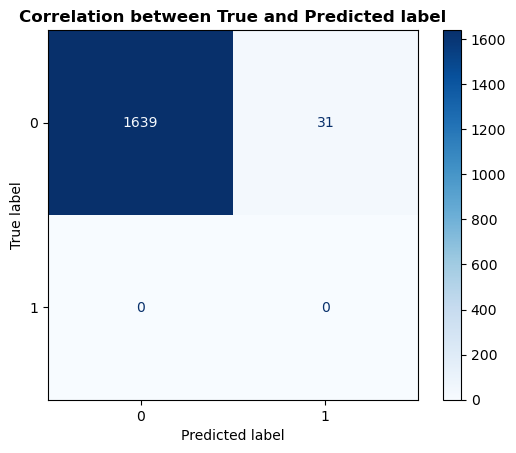

In [65]:
ConfusionMatrixDisplay.from_predictions(y_coll, coll_predictions, cmap = 'Blues')
plt.title('Correlation between True and Predicted label', weight = 'bold');

## *Vulgar language warning!!!!*

#### List of all false predicetd posts

In [67]:
pred_colls = pd.DataFrame(coll_predictions, columns=['predictions'])

false_pred = college.iloc[pred_colls[pred_colls['predictions'] == 1].index]
false_pred

,post,sent_score,post_tokenized,post_lemmatized,joined_words
41,walked in on my roommate sucking his own dicki...,0,"['walked', 'roommate', 'sucking', 'dicki', 'ho...","['walked', 'roommate', 'suck', 'dicki', 'hones...",walked roommate suck dicki honestly mind much ...
45,it’s honestly disgusting what happened to easy...,0,"['honestly', 'disgusting', 'happened', 'easybi...","['honestly', 'disgust', 'happen', 'easybibyoun...",honestly disgust happen easybibyounger zoomers...
47,writing prof here: how to add to essay length ...,0,"['writing', 'prof', 'add', 'essay', 'length', ...","['write', 'prof', 'add', 'essay', 'length', 'w...",write prof add essay length without fluff form...
51,roomate goes to bed so early and gets annoyed ...,0,"['roomate', 'goes', 'bed', 'early', 'gets', 'a...","['roomate', 'go', 'bed', 'early', 'get', 'anno...",roomate go bed early get annoy tok move dorm f...
94,does anyone else feel... strange?i’ve been doi...,0,"['anyone', 'else', 'feel', 'strange', 'online'...","['anyone', 'else', 'feel', 'strange', 'online'...",anyone else feel strange online college three ...
116,"i ( f) have adhd and i've been a straight a, ...",0,"['f', 'adhd', 'straight', 'hr', 'semester', 'f...","['f', 'adhd', 'straight', 'hr', 'semester', 'f...",f adhd straight hr semester fully virtual coll...
152,to those of us isolating from family today or ...,0,"['us', 'isolating', 'family', 'today', 'come',...","['us', 'isolate', 'family', 'today', 'come', '...",us isolate family today come happy home happy ...
194,i forget how loaded people are in universityli...,0,"['forget', 'loaded', 'people', 'universitylike...","['forget', 'loaded', 'people', 'universitylike...",forget loaded people universitylike knewww peo...
202,my father suddenly committed suicide on christ...,0,"['father', 'suddenly', 'committed', 'suicide',...","['father', 'suddenly', 'commit', 'suicide', 'c...",father suddenly commit suicide christmas day h...
238,i’m just donei’m so fucking demotivated and ti...,0,"['donei', 'fucking', 'demotivated', 'tired', '...","['donei', 'fuck', 'demotivated', 'tired', 'hon...",donei fuck demotivated tired honestly know eve...
